<a href="https://colab.research.google.com/github/aliahalotaibi73/week7_exercises/blob/main/CBOW_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Word Embeddings using CBOW
In this tutorial, we'll learn how to create word embeddings using the Continuous Bag of Words (CBOW) model. Word embeddings are vector representations of words that capture their meanings, contexts, and relationships. CBOW is a simple and effective neural network model that predicts a target word from its surrounding context words.

## Step 1: Importing Required Libraries


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Step 2: Defining the Corpus
Let's define a simple corpus of sentences to train our CBOW model. This corpus will consist of three sentences.

In [3]:
corpus = ['The cat sat on the mat',
          'The dog ran in the park',
          'The bird sang in the tree']

## Step 3: Tokenizing the Corpus
We convert the corpus into a sequence of integers using Keras' `Tokenizer`. This step is necessary to transform the text data into numerical data that can be used by the neural network.

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print('After converting our words in the corpus into vector of integers:')
print(sequences)

After converting our words in the corpus into vector of integers:
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print('After converting our words in the corpus into vector of integers:')
print(sequences)

After converting our words in the corpus into vector of integers:
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


## Step 4: Defining Model Parameters
Next, we define some parameters for our CBOW model:
- `vocab_size`: The size of the vocabulary (total number of unique words).
- `embedding_size`: The size of the word embedding vectors.
- `window_size`: The number of context words to consider on either side of the target word.

In [6]:
vocab_size = len(tokenizer.word_index) + 1 # because index is zero base
embedding_size = 10 # hidden layer is ten
window_size = 2

## Step 5: Generating Context-Target Pairs
We generate context-target pairs for training the CBOW model. The context consists of words surrounding a target word within a defined window size.

In [8]:
contexts = []
targets = []
#[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]] , length = 3 , window-size = 2
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)
        print(context)
        print(target)
X = np.array(contexts)
print(X)
y = tf.keras.utils.to_categorical(targets, num_classes=vocab_size)
print(y)

[1, 3, 5, 1]
4
[3, 4, 1, 6]
5
[1, 7, 2, 1]
8
[7, 8, 1, 9]
2
[1, 10, 2, 1]
11
[10, 11, 1, 12]
2
[[ 1  3  5  1]
 [ 3  4  1  6]
 [ 1  7  2  1]
 [ 7  8  1  9]
 [ 1 10  2  1]
 [10 11  1 12]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Step 6: Building the CBOW Model
We use Keras' Sequential API to build the CBOW model. The model consists of an `Embedding` layer to learn word embeddings, a `Lambda` layer to average the embeddings of context words, and a `Dense` layer with a softmax activation function to predict the target word.

In [9]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)
model.save_weights('cbow_model.weights.h5')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.5727
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 2.5692
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 2.5658
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 2.5624
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 2.5589
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 2.5555
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 2.5520
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 2.5486
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 2.5452
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1667 - loss: 2.5417
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3333 - loss: 2.5383
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step -

## Step 7: Loading Pre-trained Weights and Extracting Word Embeddings
We load the pre-trained weights and extract the word embeddings from the model.

In [14]:
model.load_weights('cbow_model.weights.h5')
embeddings = model.get_weights()[0]

## Step 8: Visualizing Word Embeddings
To visualize the word embeddings, we use Principal Component Analysis (PCA) to reduce their dimensionality to 2D. This allows us to plot the embeddings on a 2D plane.

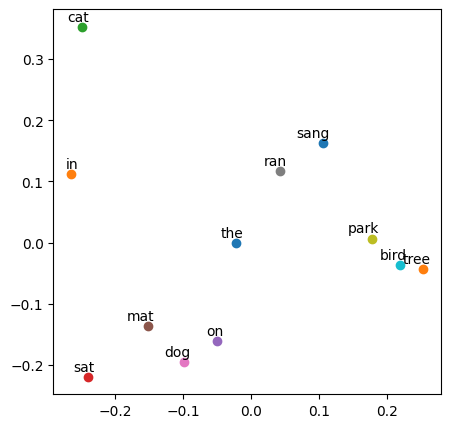

In [15]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

[Source](https://www.geeksforgeeks.org/continuous-bag-of-words-cbow-in-nlp/) for this tutorial.